In [3]:
import scipy.stats as stats 
import numpy as np
from scipy import stats
import pandas as pd
pd.options.display.float_format = '{:,.4f}'.format
from scipy.stats import kstest
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.weightstats import ztest as ztest

In [4]:
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")     

In [5]:
def check_variance_homogeneity(group1, group2):
    test_stat_var, p_value_var= stats.levene(group1,group2)
    print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        print("Reject null hypothesis >> The variances of the samples are different.")
    else:
        print("Fail to reject null hypothesis >> The variances of the samples are same.")

Q1

 A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured. Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions
Minitab File : Cutlets.mtw

In [6]:
cutlets=pd.read_csv("Cutlets.csv")

In [7]:
cutlets.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [8]:
check_normality(cutlets['Unit A'])

p value:0.3200
Fail to reject null hypothesis >> The data is normally distributed


In [9]:
check_normality(cutlets['Unit B'])

p value:0.5225
Fail to reject null hypothesis >> The data is normally distributed


In [10]:
check_variance_homogeneity(cutlets['Unit A'],cutlets['Unit B'])

p value:0.4176
Fail to reject null hypothesis >> The variances of the samples are same.


In [11]:

ttest,p_value = stats.ttest_ind(cutlets['Unit A'],cutlets['Unit B'])

In [12]:
ttest,p_value

(0.7228688704678063, 0.4722394724599501)

In [13]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

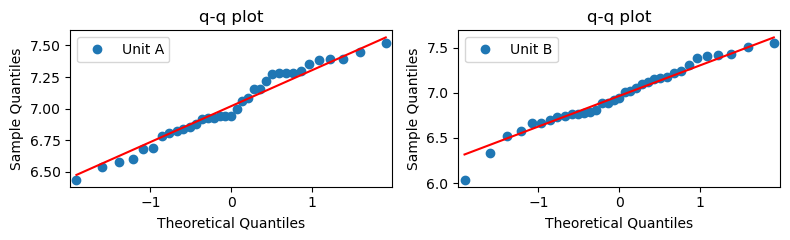

In [14]:
fig, axes=plt.subplots(figsize=(8,2.5),ncols=2)
sm.qqplot(cutlets['Unit A'],ax=axes[0],line='s')
sm.qqplot(cutlets['Unit B'],ax=axes[1],line='s')
axes[0].legend(['Unit A'])
axes[0].set_title('q-q plot')
axes[1].set_title('q-q plot')
axes[1].legend(['Unit B'])
plt.tight_layout()
plt.show()

Q2

Q2)    A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
        Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level. (Minitab File: LabTAT.mtw)


In [15]:
tat=pd.read_csv("LabTAT.csv")

In [16]:
tat.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.3500,165.5300,176.7000,166.1300
1,170.4900,185.9100,198.4500,160.7900
2,192.7700,194.9200,201.2300,185.1800
3,177.3300,183.0000,199.6100,176.4200
4,193.4100,169.5700,204.6300,152.6000


In [17]:
check_normality(tat['Laboratory 1'])

p value:0.5508
Fail to reject null hypothesis >> The data is normally distributed


In [18]:
check_normality(tat['Laboratory 2'])

p value:0.8637
Fail to reject null hypothesis >> The data is normally distributed


In [19]:
check_normality(tat['Laboratory 3'])

p value:0.4205
Fail to reject null hypothesis >> The data is normally distributed


In [20]:
check_normality(tat['Laboratory 4'])

p value:0.6620
Fail to reject null hypothesis >> The data is normally distributed


In [21]:
check_variance_homogeneity(tat['Laboratory 1'],tat['Laboratory 2'])

p value:0.0608
Fail to reject null hypothesis >> The variances of the samples are same.


In [22]:
check_variance_homogeneity(tat['Laboratory 3'],tat['Laboratory 4'])

p value:0.1547
Fail to reject null hypothesis >> The variances of the samples are same.


In [23]:
check_variance_homogeneity(tat['Laboratory 1'],tat['Laboratory 4'])

p value:0.2219
Fail to reject null hypothesis >> The variances of the samples are same.


In [24]:
ttest,p_value = stats.ttest_ind(tat['Laboratory 1'],tat['Laboratory 2'])

In [25]:
ttest,p_value

(-0.2975216812891612, 0.7663277896545946)

In [26]:
from scipy.stats import f_oneway

In [27]:
f_oneway(tat['Laboratory 1'],tat['Laboratory 2'],tat['Laboratory 3'],tat['Laboratory 4'])

F_onewayResult(statistic=118.70421654401437, pvalue=2.1156708949992414e-57)

Since pvalue is very close to 0 and p<α =0.05
The Null hypothesis is rejected and Alternative hypothesis is accepted
That is there is significant difference in the TAT among the diferent laboratories

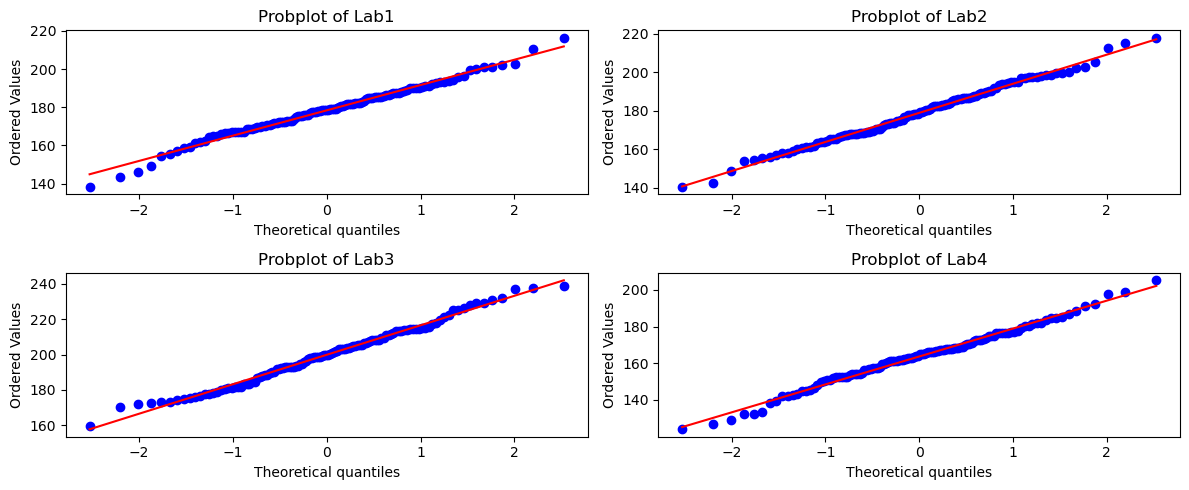

In [28]:
fig, axes=plt.subplots(figsize=(12,5),nrows=2 ,ncols=2)
stats.probplot(tat['Laboratory 1'],plot=axes[0,0])
stats.probplot(tat['Laboratory 2'],plot=axes[0,1])
stats.probplot(tat['Laboratory 3'],plot=axes[1,0])
stats.probplot(tat['Laboratory 4'],plot=axes[1,1])
axes[0,0].set_title('Probplot of Lab1')
axes[0,1].set_title('Probplot of Lab2')
axes[1,0].set_title('Probplot of Lab3')
axes[1,1].set_title('Probplot of Lab4')
plt.tight_layout()
plt.show()


Q3

Q3)Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions.

In [29]:
buyer_ratio=pd.read_csv("BuyerRatio.csv")

In [30]:
buyer_ratio.head()

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [31]:
import numpy as np
import pandas as pd
import scipy.stats as stats

In [32]:
Ratio_Observed=np.array(buyer_ratio.iloc[:,1:])

In [33]:
Ratio_Observed

array([[  50,  142,  131,   70],
       [ 435, 1523, 1356,  750]], dtype=int64)

In [34]:
stat, p, dof, expected = stats.chi2_contingency(Ratio_Observed)

In [35]:
p

0.6603094907091882

Q4

Q4)TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences. Minitab File: CustomerOrderForm.mtw


In [36]:
Customer_Order_Form=pd.read_csv("Costomer+OrderForm.csv")

In [37]:
Customer_Order_Form

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [45]:
a=(Customer_Order_Form['Phillippines'].value_counts())
b=(Customer_Order_Form['Indonesia'].value_counts())
c=(Customer_Order_Form['Malta'].value_counts())
d=(Customer_Order_Form['India'].value_counts())
print(a,'\n',b,'\n',c,'\n',d)

Error Free    271
Defective      29
Name: Phillippines, dtype: int64 
 Error Free    267
Defective      33
Name: Indonesia, dtype: int64 
 Error Free    269
Defective      31
Name: Malta, dtype: int64 
 Error Free    280
Defective      20
Name: India, dtype: int64


In [48]:
observed=[[a[0],b[0],c[0],d[0]],[a[1],b[1],c[1],d[1]]]
observed

[[271, 267, 269, 280], [29, 33, 31, 20]]

In [51]:
#performing chi2 test
stat, p, dof, expected = stats.chi2_contingency(observed)
p

0.2771020991233135

p>0.05, so failed to reject the Null Hypothesis

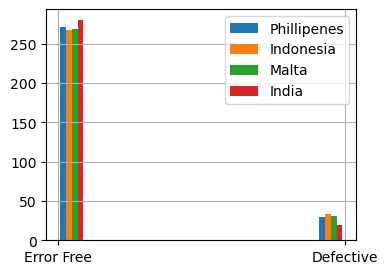

In [58]:
plt.figure(figsize=(4,3))
plt.hist(Customer_Order_Form,label=['Phillipenes','Indonesia','Malta','India'])
plt.grid('whitegrid')
plt.legend()